## *Data: Feature extraction, and visualization*

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [16]:
df=pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,NaN,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,1401,4,118,2022-09-11,0.87,1,42,5,NaN
1,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,NaN,Nrrebro,55.69388,12.54725,Entire home/apt,793,5,92,2023-03-22,0.69,1,5,4,NaN
2,338992,Rental unit in Copenhagen · ★4.58 · 2 bedrooms...,799887,Bente,NaN,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,1000,1,378,2022-09-26,2.75,3,0,2,NaN
3,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,NaN,Nrrebro,55.68641,12.54741,Entire home/apt,803,3,173,2023-01-02,1.03,1,0,1,NaN
4,339126,Rental unit in Copenhagen · ★4.88 · 2 bedrooms...,1589153,Michael & Bille Max,NaN,Vesterbro-Kongens Enghave,55.67284,12.54717,Entire home/apt,2400,2,77,2023-06-19,0.57,1,128,14,NaN


In [17]:
df.shape

(17027, 18)

In [18]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [19]:
df=df.drop(columns=['neighbourhood_group','license','id','host_id','host_name','calculated_host_listings_count','last_review', 'reviews_per_month', 'number_of_reviews_ltm'])    #drop non-desired columns

Here we perform data parsing for column 'name', transforming it into 'type,rating,bed,bedroom,bath' columns. Also, we make sure that datatypes for newly created columns are correct.

In [21]:
#extract the information/datatype from the 'name' column
df['type'] = df['name'].str.extract(r'^(.*?)\s*[\d.]+')
#extract the rating and convert to numeric
rating_format1 = df['name'].str.extract(r'(\d+\.\d+)')  #rating format "x.x"
rating_format2 = df['name'].str.extract(r'(\d+\.\d+)\/')  #rating format "x.x/"
df['rating'] = pd.to_numeric(rating_format1.fillna(rating_format2)[0], errors='coerce')
#extract the num of bed,bedrooms, baths
df['bedroom'] = df['name'].str.extract(r'(\d+)\s+bedroom')  # Extracts the number of bedrooms
df['bed'] = df['name'].str.extract(r'(\d+)\s+bed')  # Extracts the number of beds
df['bath'] = df['name'].str.extract(r'(\d+)\s+bath')  # Extracts the number of baths
#convert the columns to the appropriate data types (int - since it's num of bed,bedrooms, baths)
df['bedroom'] = pd.to_numeric(df['bedroom'], errors='coerce')
df['bed'] = pd.to_numeric(df['bed'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')
#drop 'name' column
df.drop(columns=['name'], inplace=True)

In [24]:
#If we're missing values in one of these 9 filtered columns, we remove that row..
if df['price'].isna().any():
    print(f"Column has missing values.")
else:
    print(f"Column has no missing values.")

Column has no missing values.


In [27]:
# Our dataset looks like this now;
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,type,rating,bedroom,bed,bath
0,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,1401,4,118,42,Rental unit in Copenhagen · ★,4.88,1.0,1.0,1.0
1,Nrrebro,55.69388,12.54725,Entire home/apt,793,5,92,5,Rental unit in Copenhagen · ★,4.91,1.0,1.0,1.0
2,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,1000,1,378,0,Rental unit in Copenhagen · ★,4.58,2.0,2.0,NaN
3,Nrrebro,55.68641,12.54741,Entire home/apt,803,3,173,0,Rental unit in Copenhagen · ★,4.78,1.0,1.0,1.0
4,Vesterbro-Kongens Enghave,55.67284,12.54717,Entire home/apt,2400,2,77,128,Rental unit in Copenhagen · ★,4.88,2.0,2.0,5.0


Pearson correlation heatmap, to investigate the connection of price with other attributes:

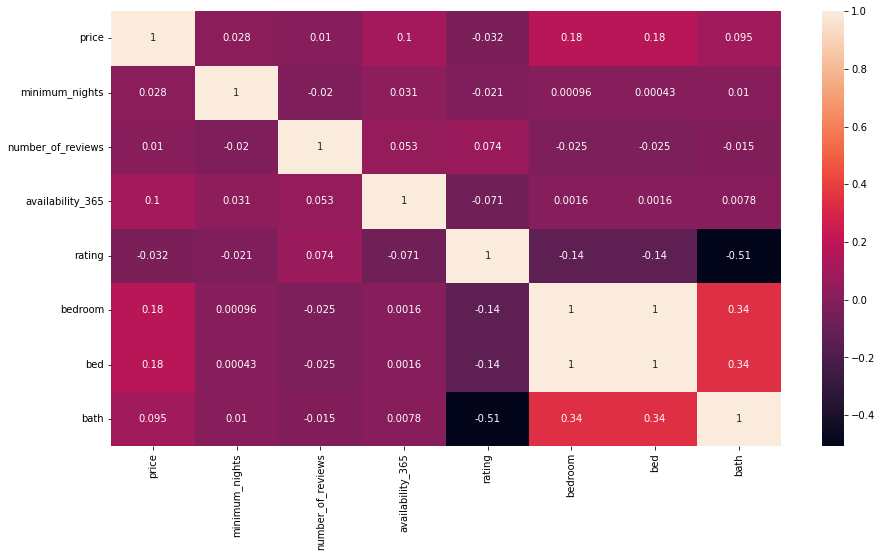

In [26]:
df_cor=df[['price','minimum_nights','number_of_reviews','availability_365','rating','bedroom','bed','bath']]
plt.figure(figsize=(15,8))
sb.heatmap(df_cor.corr(method="pearson"), annot=True, annot_kws={"size":10})
plt.show()